<a href="https://colab.research.google.com/github/lukman-17/Cyber-Attack-Prediction-using-ML/blob/main/Cyber_Attack_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 # Import necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Cyberattacks Detection.csv')

In [ ]:
df.head()

,Attack ID,Source IP,Destination IP,Source Country,Destination Country,Protocol,Source Port,Destination Port,Attack Type,Payload Size (bytes),Detection Label,Confidence Score,ML Model,Affected System,Port Type,Timestamp
0,1.0,68.156.227.194,194.91.121.112,India,USA,ICMP,16824.0,53410.0,Brute Force,3936.0,Detected,0.600507,K-Nearest Neighbors,Cloud Storage,Other,NaN
1,2.0,249.221.229.41,3.207.120.235,Germany,USA,TCP,23977.0,31745.0,Advanced Persistent Threat (APT),2870.0,Detected,0.524150,K-Nearest Neighbors,Network Router,Other,NaN
2,4.0,154.55.209.171,132.115.33.82,USA,China,UDP,36556.0,38880.0,Cross-Site Scripting (XSS) Attack,3833.0,Not Detected,0.238944,Neural Network,Workstation,Other,NaN
3,5.0,106.61.204.27,40.61.49.130,France,France,UDP,14724.0,21669.0,Insider Threat,4301.0,Not Detected,0.122334,Neural Network,Workstation,Other,NaN
4,6.0,144.190.250.125,34.68.66.192,South Korea,Germany,TCP,44693.0,6474.0,Watering Hole Attack,4569.0,Detected,0.970895,Neural Network,Application Server,Other,NaN


In [ ]:
df.shape

(100000, 16)

In [ ]:
df['Affected System'].value_counts()

,count
Affected System,
Web Server,11311
Application Server,11236
Email Server,11229
Database Server,11148
Network Router,11119
Workstation,11101
IoT Device,11007
Cloud Storage,10940
Firewall,10863


In [ ]:
print("\nDataset shape:", df.shape)


Dataset shape: (100000, 16)


In [ ]:
print("\nData types and null counts:")
display(df.info())


Data types and null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Attack ID             99940 non-null  float64
 1   Source IP             99950 non-null  object 
 2   Destination IP        99945 non-null  object 
 3   Source Country        99950 non-null  object 
 4   Destination Country   99947 non-null  object 
 5   Protocol              99941 non-null  object 
 6   Source Port           99949 non-null  float64
 7   Destination Port      99946 non-null  float64
 8   Attack Type           99941 non-null  object 
 9   Payload Size (bytes)  99947 non-null  float64
 10  Detection Label       99933 non-null  object 
 11  Confidence Score      99946 non-null  float64
 12  ML Model              99939 non-null  object 
 13  Affected System       99954 non-null  object 
 14  Port Type             99939 non-null  ob

None

In [ ]:
print("Checking for missing values:")
print(df.isnull().sum())

Checking for missing values:
Attack ID                  60
Source IP                  50
Destination IP             55
Source Country             50
Destination Country        53
Protocol                   59
Source Port                51
Destination Port           54
Attack Type                59
Payload Size (bytes)       53
Detection Label            67
Confidence Score           54
ML Model                   61
Affected System            46
Port Type                  61
Timestamp               90174
dtype: int64


In [ ]:
print("Checking for duplicate rows:")
print(df.duplicated().sum())

Checking for duplicate rows:
0


In [ ]:
# Drop irrelevant columns
df.drop(columns=['Timestamp'], inplace=True)

In [ ]:
df.dropna(inplace = True)

In [ ]:
print("Statistical summary:")
display(df.describe())

Statistical summary:


,Attack ID,Source Port,Destination Port,Payload Size (bytes),Confidence Score
count,99171.000000,99171.000000,99171.000000,99171.000000,99171.000000
mean,54470.146091,32773.946980,32656.031249,2502.156356,0.498041
std,30561.978824,18963.098622,18912.798878,1443.169377,0.290237
min,1.000000,1.000000,1.000000,1.000000,0.000030
25%,27722.500000,16342.500000,16261.500000,1252.000000,0.245150
50%,55505.000000,32687.000000,32624.000000,2501.000000,0.501540
75%,83270.500000,49272.000000,49017.500000,3754.000000,0.750387
max,100000.000000,65534.000000,65534.000000,4999.000000,1.000000


In [ ]:
print("Unique values in each column:")
print(df.nunique())

Unique values in each column:
Attack ID               9826
Source IP               9826
Destination IP          9826
Source Country            10
Destination Country       10
Protocol                   3
Source Port             9148
Destination Port        9149
Attack Type               20
Payload Size (bytes)    4324
Detection Label            2
Confidence Score        9826
ML Model                   5
Affected System            9
Port Type                  3
Timestamp               9749
dtype: int64


# **EDA**

In [ ]:
print("Attack Type value counts:")
print(df['Attack Type'].value_counts())

Attack Type value counts:
Attack Type
DNS Tunneling                                       5077
Cross-Site Scripting (XSS) Attack                   5055
Malware                                             5040
Ping of Death                                       4997
Email Spam                                          4996
Advanced Persistent Threat (APT)                    4988
Drive-by Download                                   4982
Man-in-the-Middle (MITM)                            4974
Insider Threat                                      4973
Cryptojacking                                       4971
Distributed Denial of Service (DDoS)                4967
Credential Stuffing                                 4957
Simple Network Management Protocol (SNMP) Attack    4948
Phishing                                            4940
Zero-Day Exploit                                    4937
Brute Force                                         4914
Watering Hole Attack                              

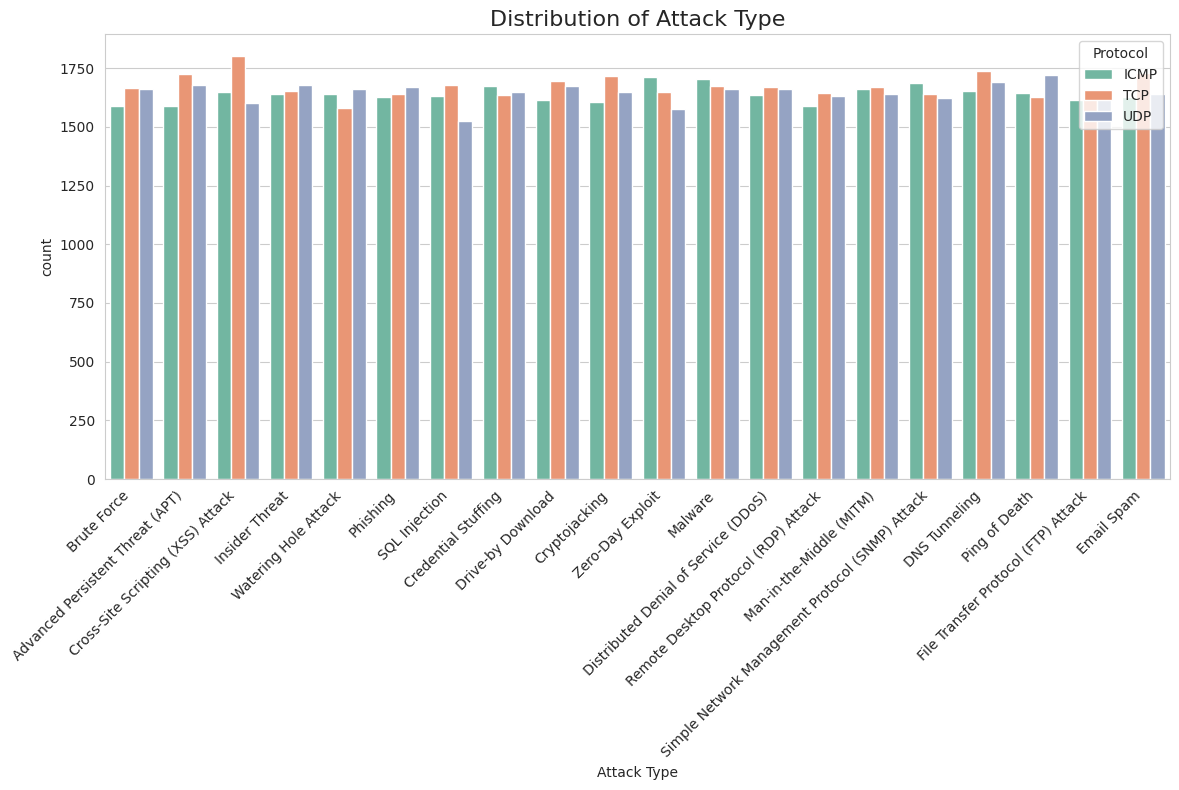

In [ ]:
plt.figure(figsize=(12, 8))

# Create the count plot
sns.countplot(x='Attack Type', data=df, palette='Set2', hue='Protocol', dodge=True)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Attack Type', fontsize=16)
plt.tight_layout()

plt.show()



In [ ]:
# Numerical Feature Analysis
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

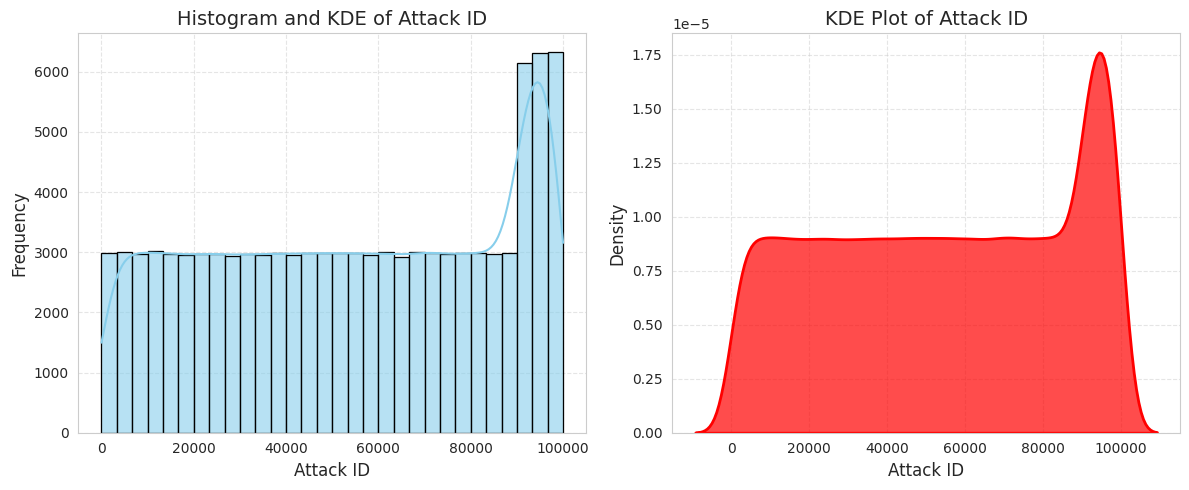

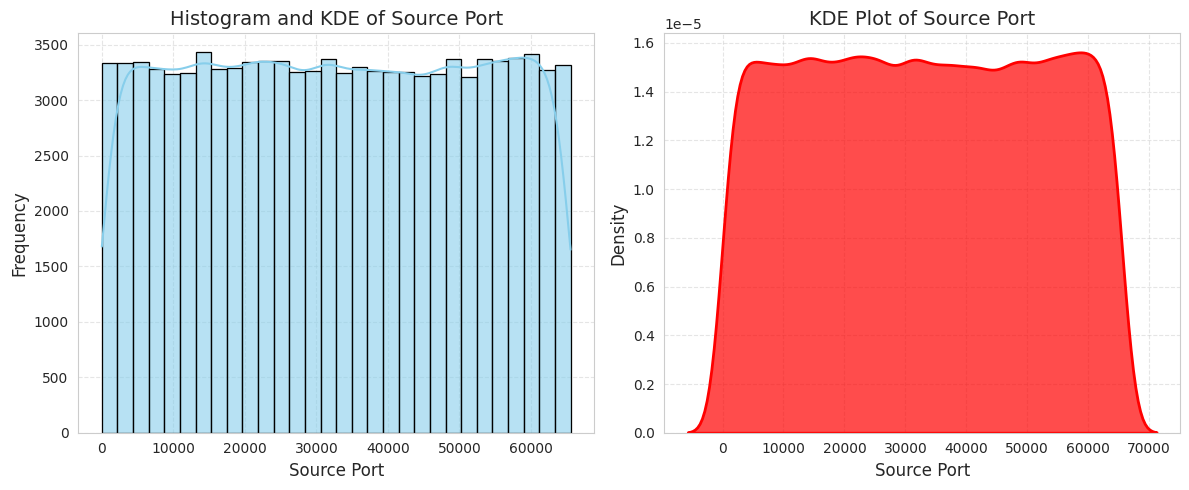

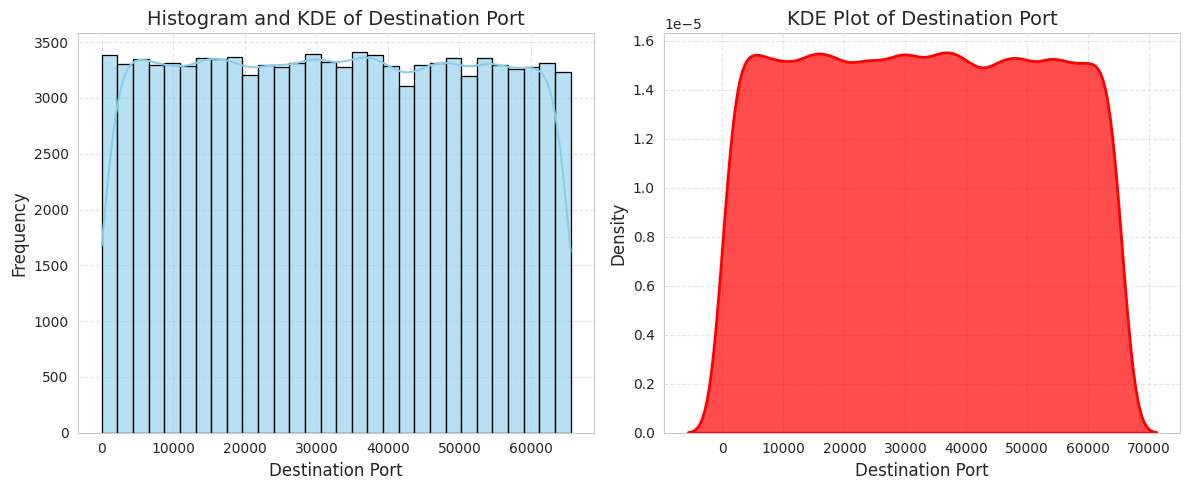

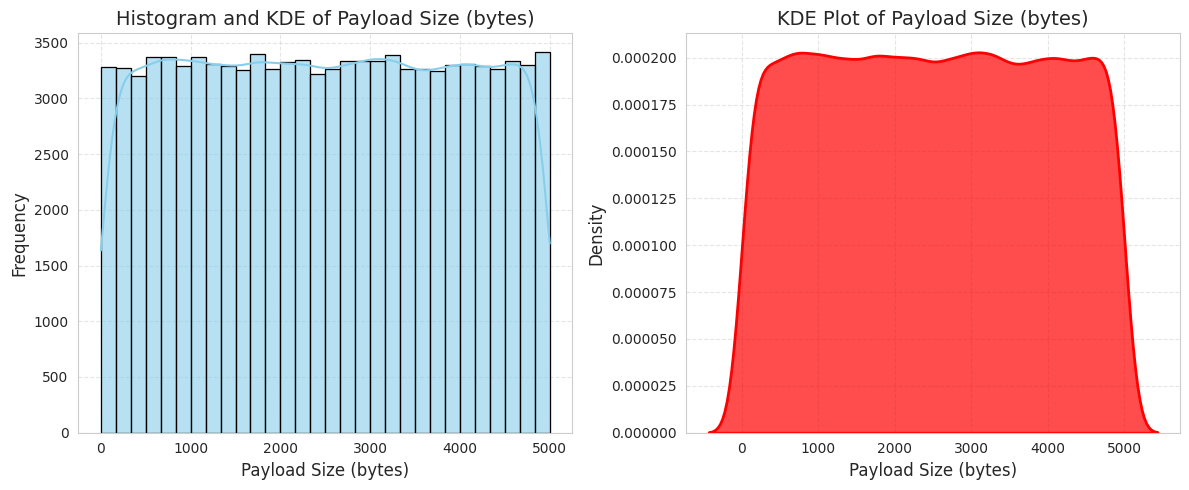

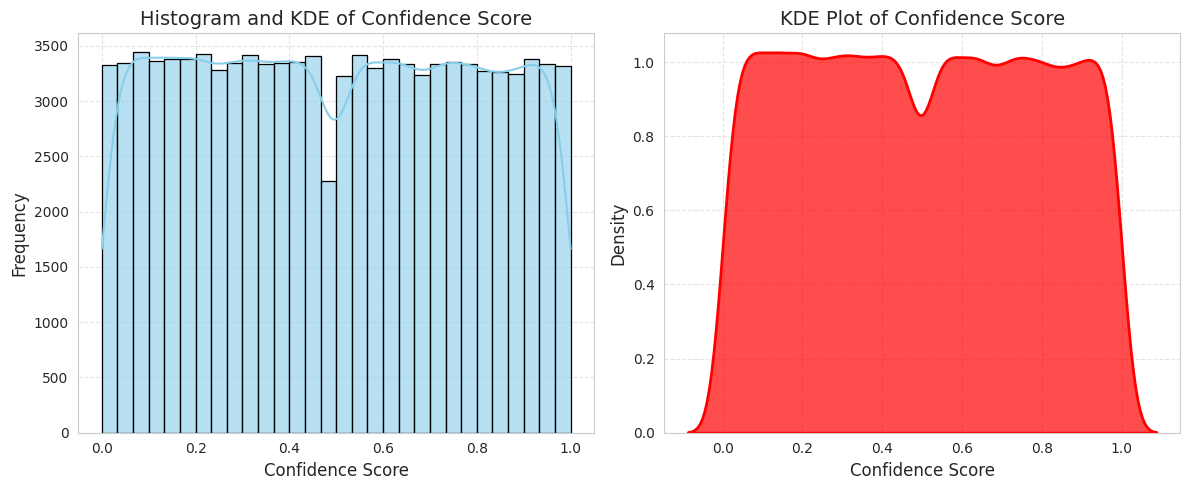

In [ ]:
# Histogram
for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    # Histogram with KDE overlay
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black', alpha=0.6)
    plt.title(f'Histogram and KDE of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)

    # Separate KDE plot with filled area
    plt.subplot(1, 2, 2)
    sns.kdeplot(df[col], fill=True, color='red', alpha=0.7, linewidth=2)
    plt.title(f'KDE Plot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)

    # Adjust layout
    plt.tight_layout()
    plt.show()


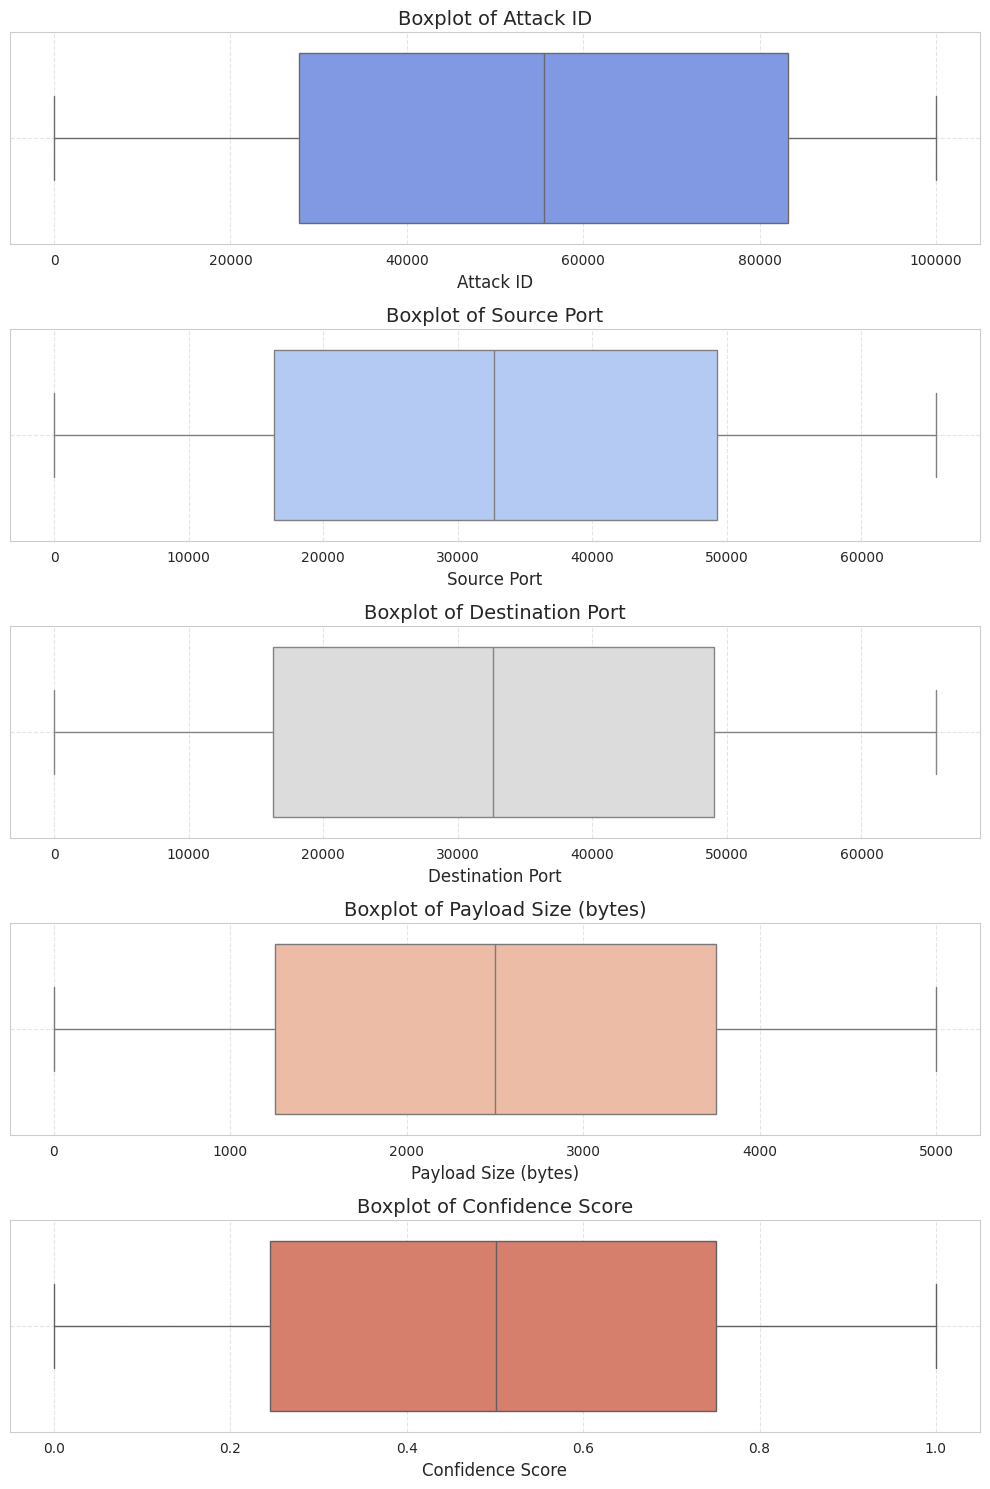

In [ ]:
# Set style and color palette for consistency
sns.set_style("whitegrid")
palette = sns.color_palette("coolwarm", len(numerical_cols))

# Display all boxplots in one figure
plt.figure(figsize=(10, len(numerical_cols) * 3))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x=df[col], color=palette[i-1], fliersize=4, flierprops=dict(marker='o', color='red', alpha=0.6))

    # Titles and labels
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


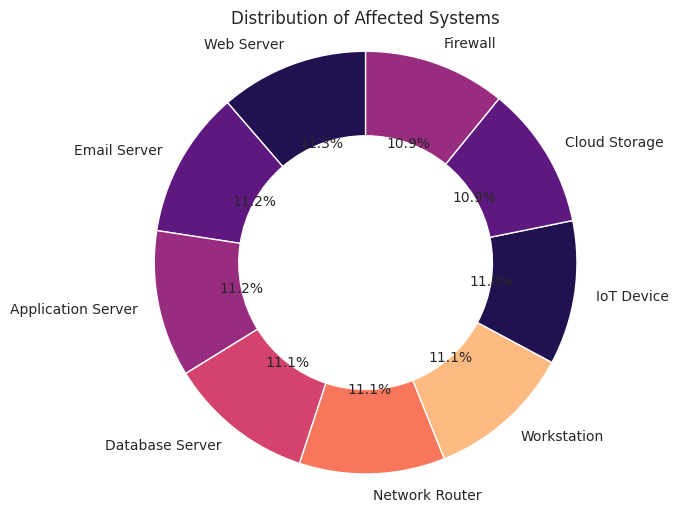

In [ ]:
#distribution of Affecred System
affected_system_counts = df['Affected System'].value_counts()

# donut plot
plt.figure(figsize=(6, 6))
plt.pie(affected_system_counts, labels=affected_system_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
plt.title('Distribution of Affected Systems')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.show()

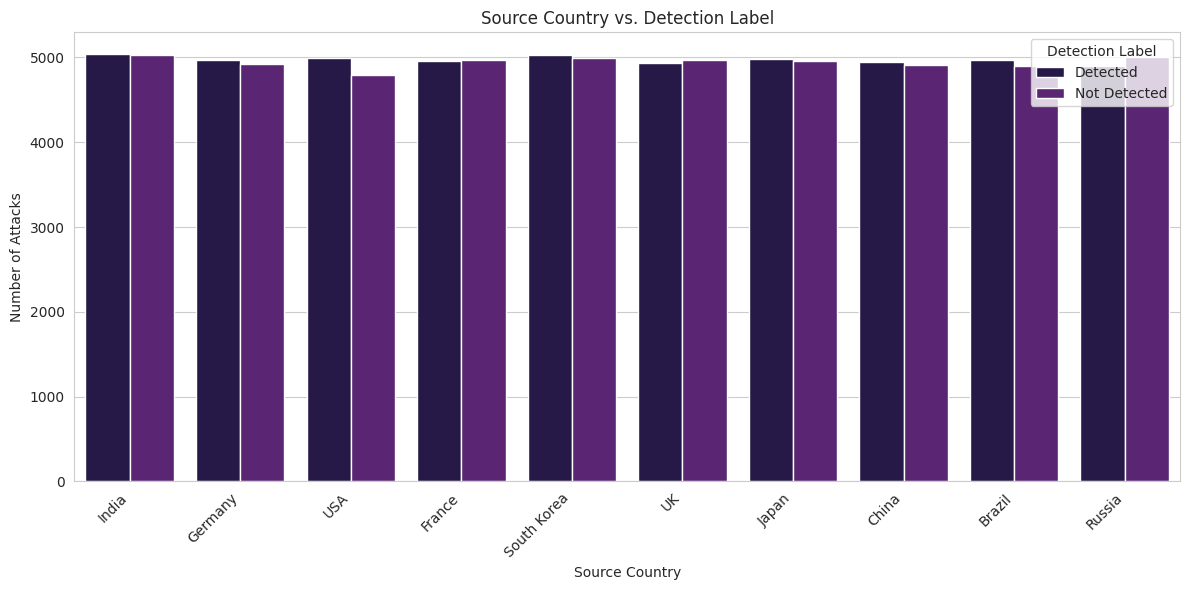

In [ ]:
# Distribution for scource country and detected labels
plt.figure(figsize=(12, 6))
sns.countplot(x='Source Country', hue='Detection Label', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Source Country vs. Detection Label')
plt.xlabel('Source Country')
plt.ylabel('Number of Attacks')
plt.tight_layout()
plt.show()

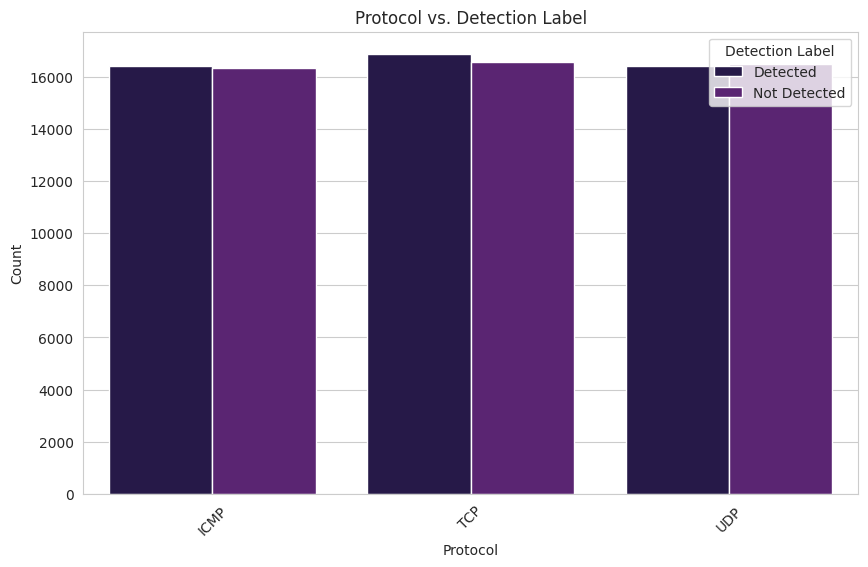

In [ ]:
#Bar plot for Protocol and Detected Label
plt.figure(figsize=(10, 6))
sns.countplot(x='Protocol', hue='Detection Label', data=df)
plt.title('Protocol vs. Detection Label')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

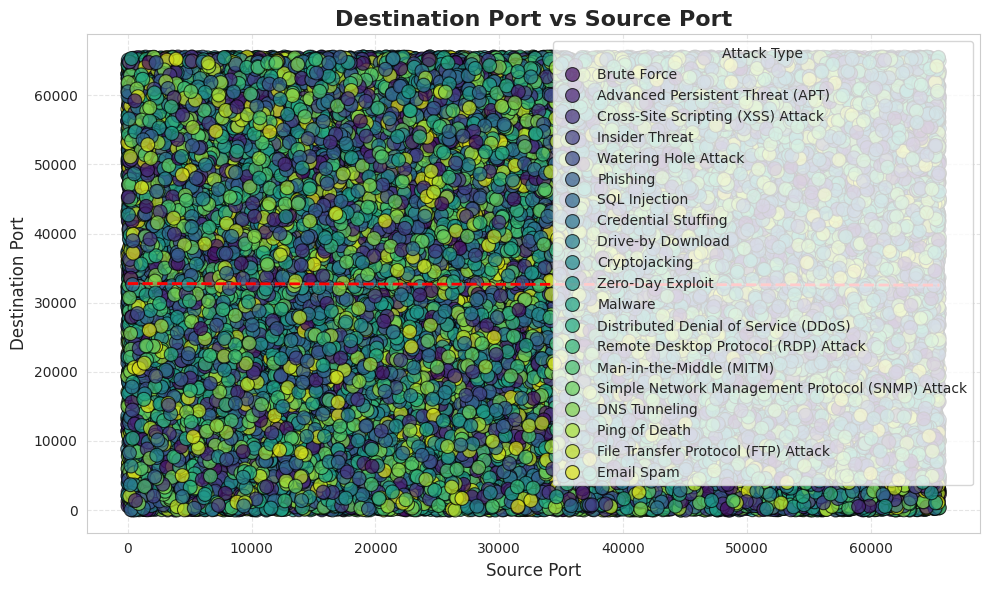

In [ ]:
sns.set_style("whitegrid")

x_column = 'Source Port'
y_column = 'Destination Port'

plt.figure(figsize=(10, 6))

# Scatter plot with custom marker style
sns.scatterplot(x=df[x_column], y=df[y_column],
                hue=df['Attack Type'],
                palette='viridis',
                marker='o',
                s=100,
                edgecolor='black',
                alpha=0.7)

# Regression line
sns.regplot(x=df[x_column], y=df[y_column], scatter=False,
            color='red', line_kws={'linewidth': 2, 'linestyle': '--'})

# Add titles and labels
plt.title(f'{y_column} vs {x_column}', fontsize=16, fontweight='bold')
plt.xlabel(x_column, fontsize=12)
plt.ylabel(y_column, fontsize=12)
plt.legend(title='Attack Type', loc='upper right')

# Display gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


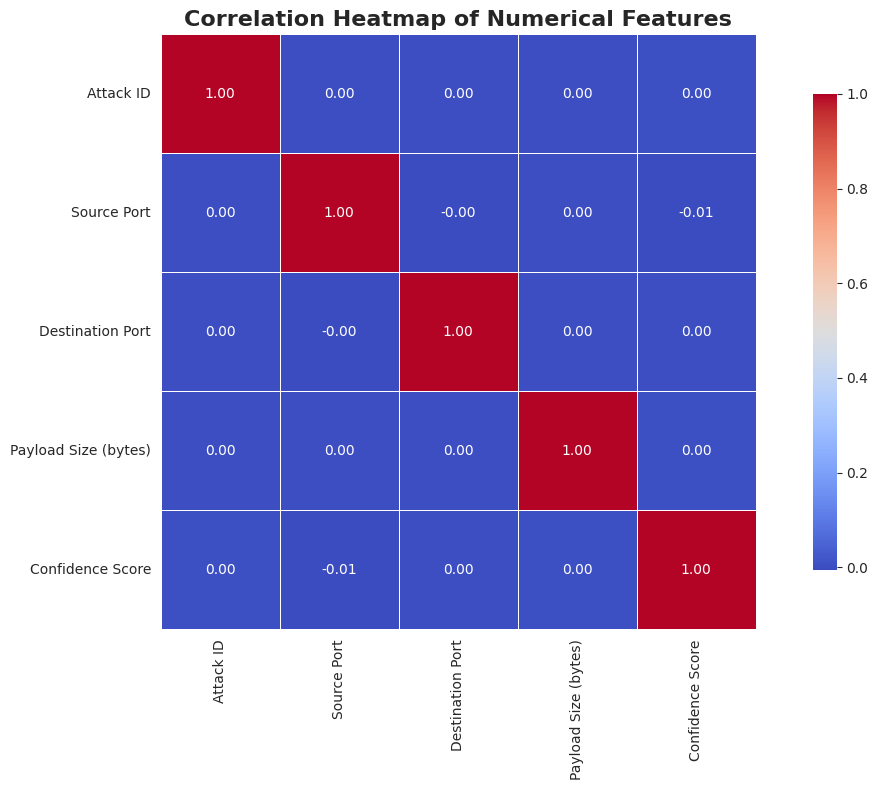

In [ ]:
#Heatmap

# Set style for visuals
sns.set_style("white")

correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=0.5,
            linecolor='white',
            square=True,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 10})

# Add title
plt.title("Correlation Heatmap of Numerical Features", fontsize=16, fontweight='bold')


plt.tight_layout()


plt.show()


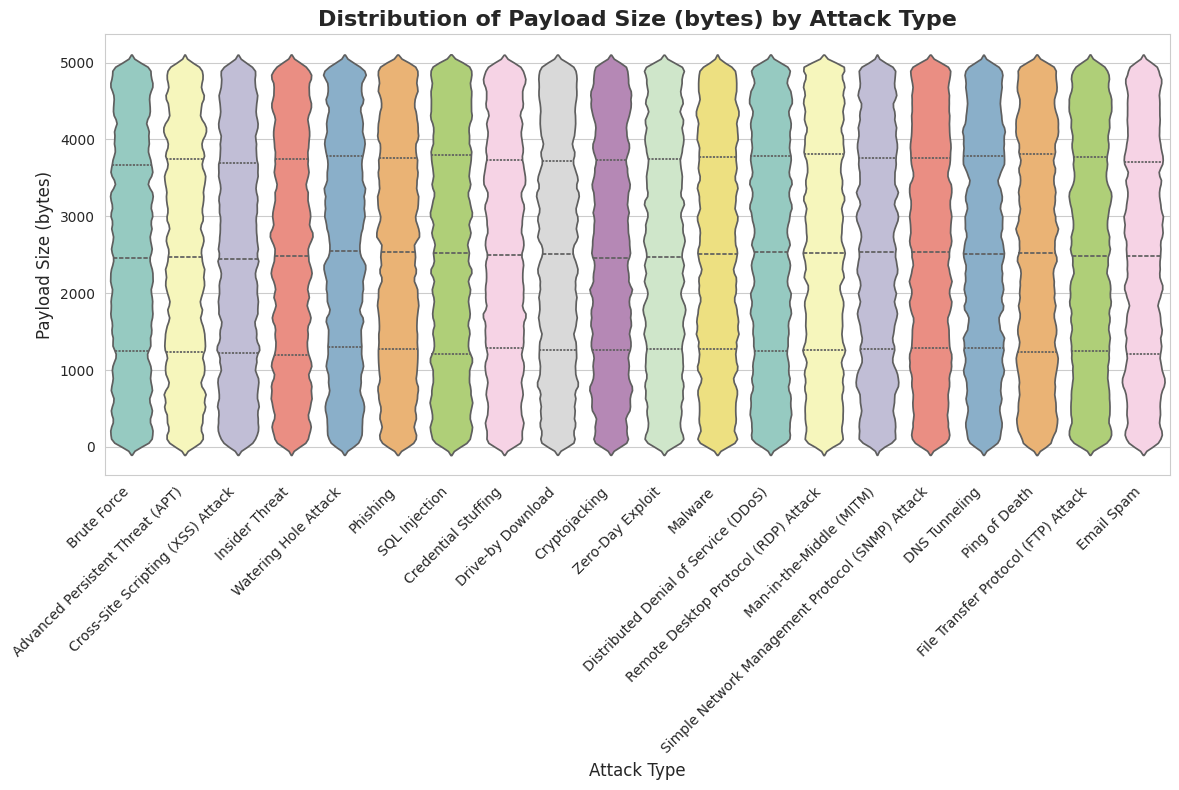

In [ ]:
# Set style for better visuals
sns.set_style("whitegrid")


x_column = 'Attack Type'
y_column = 'Payload Size (bytes)'
plt.figure(figsize=(12, 8))

# Violin plot with updated parameters
sns.violinplot(x=df[x_column], y=df[y_column],
               hue=df[x_column],
               palette='Set3',
               inner='quartile',
               density_norm='width',
               bw_adjust=0.2,
               legend=False)

# Title and labels
plt.title(f'Distribution of {y_column} by {x_column}', fontsize=16, fontweight='bold')
plt.xlabel(x_column, fontsize=12)
plt.ylabel(y_column, fontsize=12)


plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


#Models

In [ ]:
# Mapping of Attack Type
attack_mapping = {
    'Distributed Denial of Service (DDoS)': 'Network-Based',
    'Simple Network Management Protocol (SNMP) Attack': 'Network-Based',
    'Remote Desktop Protocol (RDP) Attack': 'Network-Based',
    'DNS Tunneling': 'Network-Based',
    'Ping of Death': 'Network-Based',
    'Malware': 'Malware/Exploitation',
    'Zero-Day Exploit': 'Malware/Exploitation',
    'Cryptojacking': 'Malware/Exploitation',
    'Drive-by Download': 'Malware/Exploitation',
    'Advanced Persistent Threat (APT)': 'Malware/Exploitation',
    'Credential Stuffing': 'Authentication/Identity',
    'Phishing': 'Authentication/Identity',
    'Insider Threat': 'Authentication/Identity',
    'Brute Force': 'Authentication/Identity',
    'Email Spam': 'Authentication/Identity',
    'SQL Injection': 'Web-Based',
    'Cross-Site Scripting (XSS) Attack': 'Web-Based',
    'Man-in-the-Middle (MITM)': 'Web-Based',
    'Watering Hole Attack': 'Web-Based',
    'File Transfer Protocol (FTP) Attack': 'File/System Exploits'
}
df['Attack_Category'] = df['Attack Type'].map(attack_mapping)


In [ ]:
df['Attack_Category'].unique()

array(['Authentication/Identity', 'Malware/Exploitation', 'Web-Based',
       'Network-Based', 'File/System Exploits'], dtype=object)

In [ ]:
df.drop(columns=['Source IP', 'Destination IP', 'Attack ID'], inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoders = {}
for column in ['Protocol', 'Source Country', 'Destination Country',
               'Detection Label', 'ML Model', 'Affected System',
               'Port Type', 'Attack Type']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

scaler = StandardScaler()
numerical_columns = ['Source Port', 'Destination Port', 'Payload Size (bytes)','Confidence Score']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

X = df.drop(columns=['Attack_Category'])
y = df['Attack_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#Train the model
rf_model=RandomForestClassifier(class_weight='balanced',n_estimators=100, max_depth=10, random_state=442)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

acc_rf=accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc_rf:.2f}")

Random Forest Classification Report:
                         precision    recall  f1-score   support

Authentication/Identity       1.00      0.99      0.99      7434
   File/System Exploits       1.00      1.00      1.00      1463
   Malware/Exploitation       0.75      1.00      0.86      7476
          Network-Based       1.00      0.47      0.64      7456
              Web-Based       0.79      1.00      0.88      5923

               accuracy                           0.86     29752
              macro avg       0.91      0.89      0.87     29752
           weighted avg       0.89      0.86      0.85     29752

Confusion Matrix:
[[7329    0    5    0  100]
 [   0 1463    0    0    0]
 [   1    0 7474    1    0]
 [   0    0 2483 3511 1462]
 [   0    0   16    4 5903]]
Accuracy: 0.86


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42) # Increased max_iter

# Train the model
logreg_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

acc_logreg = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc_logreg:.2f}")

Logistic Regression Classification Report:
                         precision    recall  f1-score   support

Authentication/Identity       0.27      0.43      0.33      7434
   File/System Exploits       0.00      0.00      0.00      1463
   Malware/Exploitation       0.13      0.06      0.08      7476
          Network-Based       0.31      0.59      0.41      7456
              Web-Based       0.20      0.01      0.02      5923

               accuracy                           0.27     29752
              macro avg       0.18      0.22      0.17     29752
           weighted avg       0.22      0.27      0.21     29752

Confusion Matrix:
[[3204    0 1731 2499    0]
 [   9    0 1416   38    0]
 [3983    0  465 2751  277]
 [3028    0   49 4364   15]
 [1509    0    0 4343   71]]
Accuracy: 0.27


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train the model
dt_model = DecisionTreeClassifier(class_weight='balanced',max_depth= 5,criterion='entropy',random_state=422)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt_model.predict(X_test)
print("Decision Tree Classification Report:")

print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

acc_dt=accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc_dt:.2f}")

Decision Tree Classification Report:
                         precision    recall  f1-score   support

Authentication/Identity       1.00      1.00      1.00      7434
   File/System Exploits       1.00      1.00      1.00      1463
   Malware/Exploitation       1.00      0.79      0.89      7476
          Network-Based       0.80      0.80      0.80      7456
              Web-Based       0.80      1.00      0.89      5923

               accuracy                           0.90     29752
              macro avg       0.92      0.92      0.91     29752
           weighted avg       0.91      0.90      0.90     29752

Confusion Matrix:
[[7434    0    0    0    0]
 [   0 1463    0    0    0]
 [   0    0 5942 1534    0]
 [   0    0    0 5976 1480]
 [   0    0    0    0 5923]]
Accuracy: 0.90


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#train the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn_model.predict(X_test)
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

acc_knn=accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc_knn:.2f}")

K-Nearest Neighbors Classification Report:
                         precision    recall  f1-score   support

Authentication/Identity       0.69      0.81      0.75      7434
   File/System Exploits       0.63      0.53      0.58      1463
   Malware/Exploitation       0.76      0.73      0.74      7476
          Network-Based       0.80      0.83      0.81      7456
              Web-Based       0.66      0.54      0.59      5923

               accuracy                           0.73     29752
              macro avg       0.71      0.69      0.69     29752
           weighted avg       0.72      0.73      0.72     29752

Confusion Matrix:
[[6028  444  468  222  272]
 [ 693  770    0    0    0]
 [1095    1 5428  355  597]
 [ 141    0  304 6220  791]
 [ 763    0  960 1020 3180]]
Accuracy: 0.73


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder_attack = LabelEncoder()
y = label_encoder_attack.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the CNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1], 1)),  # Input layer with the correct shape
    layers.Conv1D(32, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(np.unique(y)), activation='softmax') # Output layer with softmax
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
              metrics=['accuracy'])

# Reshape the input data for CNN
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# Train the model
model.fit(X_train, y_train, epochs=6, batch_size=100, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Inverse transform the predictions and true labels back to original categories
y_pred_original = label_encoder_attack.inverse_transform(y_pred)
y_test_original = label_encoder_attack.inverse_transform(y_test)
conf_matrix = confusion_matrix(y_test_original, y_pred_original)
acc_cnn= accuracy_score(y_test_original, y_pred_original)

print("Classification Report:")
print(classification_report(y_test_original, y_pred_original))
print(f"Accuracy: {acc_cnn:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Epoch 1/6
635/635 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3894 - loss: 1.3156 - val_accuracy: 0.6297 - val_loss: 0.6776
Epoch 2/6
635/635 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7498 - loss: 0.5539 - val_accuracy: 0.8703 - val_loss: 0.3348
Epoch 3/6
635/635 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8773 - loss: 0.3019 - val_accuracy: 0.9028 - val_loss: 0.1830
Epoch 4/6
635/635 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9223 - loss: 0.1725 - val_accuracy: 0.9505 - val_loss: 0.1220
Epoch 5/6
635/635 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9486 - loss: 0.1132 - val_accuracy: 0.9495 - val_loss: 0.0983
Epoch 6/6
635/635 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9728 - loss: 0.0828 - val_accuracy: 0.9970 - val_loss: 0.0523
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9969 - loss: 0.0542
Test Loss: 0.0530
Test Accuracy: 0.9970
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
                         precision    recall  f1-score   su

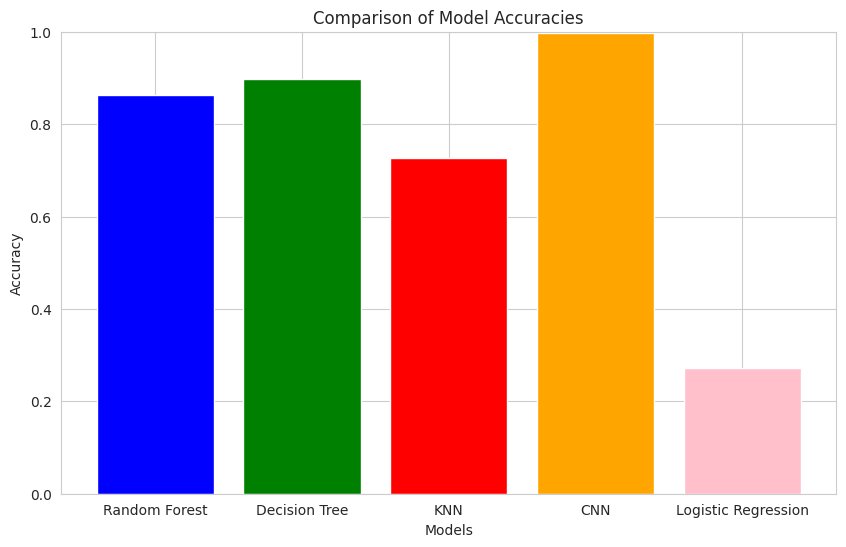

In [ ]:
models = ['Random Forest', 'Decision Tree', 'KNN','CNN','Logistic Regression']
accuracies = [acc_rf, acc_dt, acc_knn,acc_cnn,acc_logreg]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red','orange','pink'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0, 1])  # Set y-axis limit to 0-1 for accuracy
plt.show()